In [4704]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import sklearn.preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer



### Extract data

In [4705]:
data_array = []
csv_file_path='D:\\Artificial intelligence\\IA 2023 -\\Machine Learning\\Sklearn\\Regression\\Houses.csv'
# Open the CSV file
with open(csv_file_path, 'r') as csv_file:
    # Create a CSV reader
    csv_reader = csv.reader(csv_file)
    
    # Iterate through each row in the CSV file
    for row in csv_reader:

        data_array.append(row)

data_array=np.array(data_array)
# data=data_array[1:,:].astype(float)

df= pd.DataFrame(data_array)

for i in range (len(df.columns)): # Renaming the columns 
    df.rename(columns={df.columns[i]: df.iloc[0,i]},inplace=True)
df.drop(0,inplace=True)


df.head()

df.drop(['Carpet_area','Rainfall'],axis=1,inplace=True) 
# Reasons :
# Rainfall got poor correlation and CArpet_area got high correlation with builtup_area 


### Data coding , selecting

In [4718]:


pd.set_option('future.no_silent_downcasting', True)
df.replace({'Parking_type': {'Not Provided': 0}}, inplace=True)
df.replace({'Parking_type': {'No Parking': 0}}, inplace=True)
df.replace({'Parking_type': {'Open': 1}}, inplace=True)
df.replace({'Parking_type': {'Covered': 2}}, inplace=True)


df.replace({'City_type': {'CAT A': 3}}, inplace=True)
df.replace({'City_type': {'CAT B': 2}}, inplace=True)
df.replace({'City_type': {'CAT C': 1}}, inplace=True)
data= df.values
df.head()

,Taxi_dist,Market_dist,Hospital_dist,Builtup_area,Parking_type,City_type,Price_house
1,9796,5250,10703,1961,1,2,6649000
2,8294,8186,12694,1752,0,2,3982000
3,11001,14399,16991,1609,0,3,5401000
4,8301,11188,12289,1748,2,2,5373000
5,10510,12629,13921,2111,0,2,4662000


### Data Cleaning 

In [4707]:

new_data = [[float(value) if value else np.nan for value in row] for row in data]
new_data=np.array(new_data)



cleaned_df = pd.DataFrame(new_data)
cleaned_df.columns = df.columns

ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
new_data = ImputedModule.fit_transform(new_data)

features = new_data[:,:-1]
target= new_data[:,-1]





### Data Scaling

In [4708]:
scaler  = pp.StandardScaler()
features = scaler.fit_transform(features)

target/=100000




<b>
    <div style='padding:5px;background-color:#E13213;color:white;border-radius:2px;;text-align: center'>
       <h1>EDA</h1> 
    </div>
</b>

In [4709]:
df_corr = pd.DataFrame(cleaned_df.corr())
df_corr.columns = df.columns
df_corr.head(len(df_corr))# Correlation matrix of features selected

,Taxi_dist,Market_dist,Hospital_dist,Builtup_area,Parking_type,City_type,Price_house
Taxi_dist,1.000000,0.460971,0.800718,0.128825,-0.026874,0.004201,0.187540
Market_dist,0.460971,1.000000,0.626503,0.087144,-0.006844,0.051939,0.161293
Hospital_dist,0.800718,0.626503,1.000000,0.106497,-0.019267,0.026303,0.166093
Builtup_area,0.128825,0.087144,0.106497,1.000000,0.088428,-0.023665,0.746689
Parking_type,-0.026874,-0.006844,-0.019267,0.088428,1.000000,0.037031,0.086023
City_type,0.004201,0.051939,0.026303,-0.023665,0.037031,1.000000,0.222213
Price_house,0.187540,0.161293,0.166093,0.746689,0.086023,0.222213,1.000000


In [4710]:
cleaned_df.describe()

,Taxi_dist,Market_dist,Hospital_dist,Builtup_area,Parking_type,City_type,Price_house
count,919.000000,919.000000,931.000000,917.000000,560.000000,932.000000,9.320000e+02
mean,8229.727965,11018.752992,13072.092374,1794.924755,1.335714,2.097639,6.084695e+06
std,2561.985008,2543.920590,2586.456161,468.159457,0.472662,0.774260,5.025364e+06
min,146.000000,1666.000000,3227.000000,932.000000,1.000000,1.000000,3.000000e+04
25%,6476.000000,9354.500000,11301.500000,1583.000000,1.000000,1.000000,4.658000e+06
50%,8230.000000,11161.000000,13163.000000,1774.000000,1.000000,2.000000,5.866000e+06
75%,9937.000000,12670.500000,14817.000000,1982.000000,2.000000,3.000000,7.187250e+06
max,20662.000000,20945.000000,23294.000000,12730.000000,2.000000,3.000000,1.500000e+08


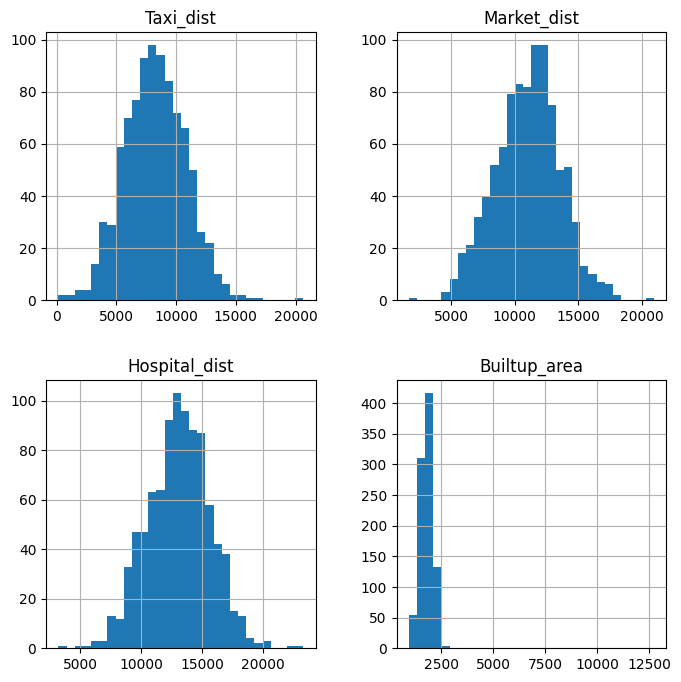

In [4711]:
# Histogram

columns_to_plot = ['Taxi_dist','Market_dist', 'Hospital_dist', 'Builtup_area']  # Replace with the actual column names you want to plot

# Select only the desired columns from the DataFrame
selected_columns_df = cleaned_df[columns_to_plot]

# Plot histograms for the selected columns
selected_columns_df.hist(bins=30, figsize=(8, 8),align='mid')
plt.show()


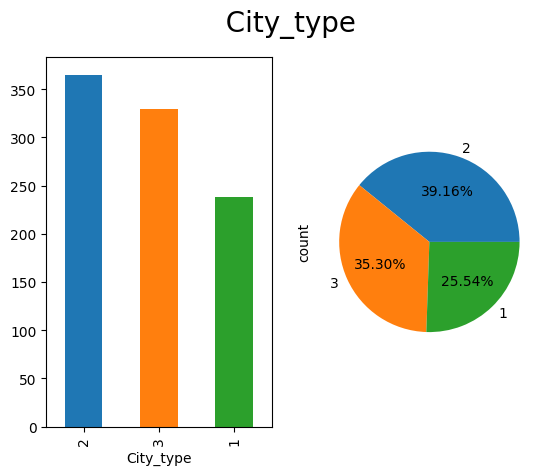

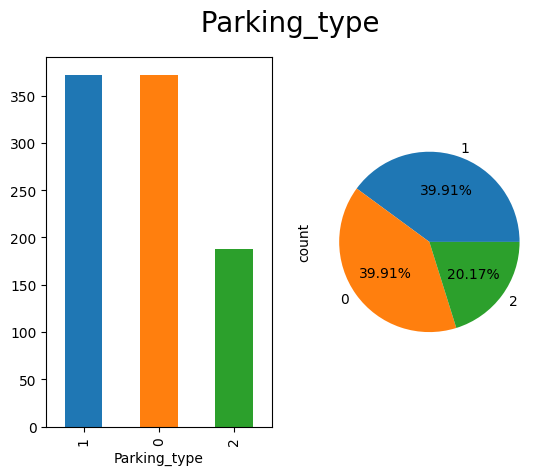

In [4712]:
import seaborn as sns
columns_to_plot = ['City_type','Parking_type']  # Replace with the actual column names you want to plot
for i in columns_to_plot:
    fig, ax = plt.subplots(1, 2) 
    fig.suptitle(f'  {i} ', fontsize=20) 
    plt.subplot(1,2,1)
    df[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
    plt.subplot(1,2,2)
    df[i].value_counts().plot(kind='pie',autopct="%.2f%%")


plt.show()

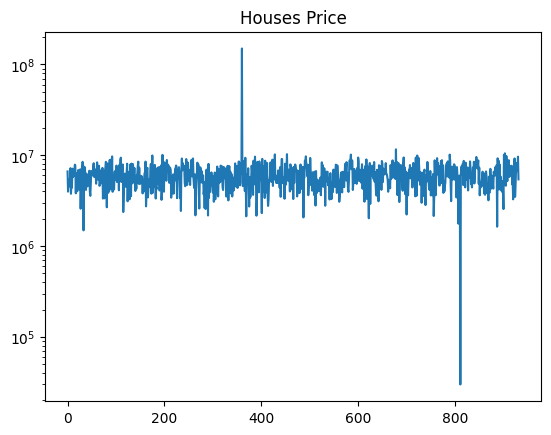

In [4713]:
cleaned_df['Price_house'].plot()
plt.title('Houses Price')
plt.yscale('log')  # Set logarithmic scale on the y-axis


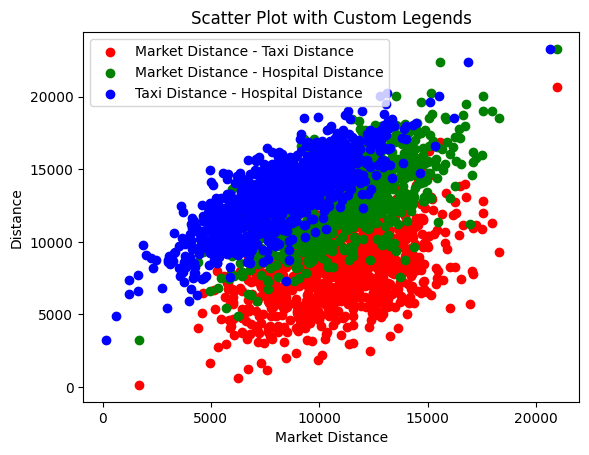

In [4714]:
# Assuming cleaned_df is your DataFrame
plt.scatter(cleaned_df['Market_dist'], cleaned_df['Taxi_dist'], label='Market vs Taxi', color='red', marker='o')
plt.scatter(cleaned_df['Market_dist'], cleaned_df['Hospital_dist'], label='Market vs Hospital', color='green', marker='o')
plt.scatter(cleaned_df['Taxi_dist'], cleaned_df['Hospital_dist'], label='Taxi vs Hospital', color='blue', marker='o')

# Add labels and title
plt.xlabel('Market Distance')
plt.ylabel('Distance')
plt.title('Scatter Plot with Custom Legends')

# Add legend with explicit labels for each set of points
plt.legend([
    'Market Distance - Taxi Distance',
    'Market Distance - Hospital Distance',
    'Taxi Distance - Hospital Distance',
   
], loc='upper left')

plt.show()

### Data split

In [4715]:
#Using quadratic solution gave better results 
poly = pp.PolynomialFeatures(degree=2)#Try degree=3 , you'll encounter overfitting (high trainScore , low TestScore)
features = poly.fit_transform(features)

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.4)

<b>
    <div style='padding:5px;background-color:#E13213;color:white;border-radius:2px;;text-align: center'>
       <h1>REGRESSION</h1> 
    </div>
</b>

In [4716]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error
import numpy as np

nn = 10  # Number of folds
n_repeats = 10 # Number of repeats for repeated k-fold

rkf = RepeatedKFold(n_splits=nn, n_repeats=n_repeats, random_state=np.random.randint(0,10000))

coefficients = np.zeros((nn * n_repeats, len(features[1])))
intercepts = np.zeros(nn * n_repeats)
best_mae = float('inf')

for i, (train_index, test_index) in enumerate(rkf.split(features)):
    print(f"Repeat {i // nn + 1}, Fold {i % nn + 1}:")

    X_train = features[train_index]
    y_train = target[train_index]
    X_test = features[test_index]
    y_test = target[test_index]

    alphas = np.logspace(-6, 6, 13)

    ridge_cv_model = RidgeCV(alphas=alphas, store_cv_values=True)

    ridge_cv_model.fit(X_train, y_train)

    selected_alpha = ridge_cv_model.alpha_
    print(f"Selected Alpha: {selected_alpha}")

    print(f'Training score is {ridge_cv_model.score(X_train, y_train)}')
    print(f'Test score is {ridge_cv_model.score(X_test, y_test)}')

    coefficients[i] = ridge_cv_model.coef_
    intercepts[i] = ridge_cv_model.intercept_

    y_pred = ridge_cv_model.predict(X_test)

    mae_value = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
    best_mae = min(best_mae, mae_value)

    if best_mae == mae_value:
        index_best_mae = i
        best_alpha = ridge_cv_model.alpha_
        print(f'NEW BEST MODEL {selected_alpha}')

    print('Mean Absolute Error Value is : ', mae_value)
    print('--------------------------')

print('----------------')
print(f'Best MAE is : {best_mae} of the fold nb :{index_best_mae} alpha : {best_alpha}')


Repeat 1, Fold 1:
Selected Alpha: 1e-06
Training score is 0.9500745221727582
Test score is 0.45273581297821275
NEW BEST MODEL 1e-06
Mean Absolute Error Value is :  10.714972021951734
--------------------------
Repeat 1, Fold 2:
Selected Alpha: 1e-06
Training score is 0.9479036871689337
Test score is 0.5011874169183551
NEW BEST MODEL 1e-06
Mean Absolute Error Value is :  10.193454294036275
--------------------------
Repeat 1, Fold 3:
Selected Alpha: 1e-06
Training score is 0.9497721243868565
Test score is 0.4002708939403975
Mean Absolute Error Value is :  11.401397293167461
--------------------------
Repeat 1, Fold 4:
Selected Alpha: 1e-06
Training score is 0.9468034440406574
Test score is 0.530233386318709
NEW BEST MODEL 1e-06
Mean Absolute Error Value is :  8.738421919172186
--------------------------
Repeat 1, Fold 5:
Selected Alpha: 1e-06
Training score is 0.9470492588981221
Test score is 0.4821820242405569
Mean Absolute Error Value is :  9.121000111173434
--------------------------

In [4717]:
import pickle
model={
    'alpha':best_alpha,
    'weights':coefficients[index_best_mae],
    'bias':intercepts[index_best_mae],
    'MAE':best_mae
}
with open('model.pkl','wb') as f:
    pickle.dump(model, f) # save the model into .pkl file (encoded)
    
with open('model.pkl','rb') as f:
   x = pickle.load(f)
   print(x)

{'alpha': 1e-06, 'weights': array([ 0.        ,  0.64965278,  0.61157215,  1.44450319,  3.15202065,
       -0.69281376, 11.61788563,  0.93921351,  1.0761472 , -0.69814107,
       -0.37622385, -0.21908754,  0.4575808 ,  0.20811735, -0.12537682,
        0.08937139,  0.59394638,  0.65605406,  0.81135309, -0.17446106,
        0.05782127, -1.38649632,  2.33204164,  1.54996768, -0.63908771,
        2.14540662, -0.28676356,  2.571187  ]), 'bias': 51.865670657600766, 'MAE': 7.379519583672186}
